In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [5]:
# reading data
hotel = pd.read_csv('hotel_bookings.csv')

In [6]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# shape of the data
hotel.shape

(119390, 32)

In [8]:
# statistical description of the data

hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# checking which column has how many null values

for i in hotel.columns:
    if hotel[i].isnull().sum()>0:
        print(f"{i} contains {np.round(hotel[i].isnull().sum()/hotel.shape[0]*100,4)}% null values.")

children contains 0.0034% null values.
country contains 0.4087% null values.
agent contains 13.6862% null values.
company contains 94.3069% null values.


In [11]:
# checking unique values in each column
for i in hotel.columns:
    print(i,':',len(hotel[i].unique()),'unique values.')

hotel : 2 unique values.
is_canceled : 2 unique values.
lead_time : 479 unique values.
arrival_date_year : 3 unique values.
arrival_date_month : 12 unique values.
arrival_date_week_number : 53 unique values.
arrival_date_day_of_month : 31 unique values.
stays_in_weekend_nights : 17 unique values.
stays_in_week_nights : 35 unique values.
adults : 14 unique values.
children : 6 unique values.
babies : 5 unique values.
meal : 5 unique values.
country : 178 unique values.
market_segment : 8 unique values.
distribution_channel : 5 unique values.
is_repeated_guest : 2 unique values.
previous_cancellations : 15 unique values.
previous_bookings_not_canceled : 73 unique values.
reserved_room_type : 10 unique values.
assigned_room_type : 12 unique values.
booking_changes : 21 unique values.
deposit_type : 3 unique values.
agent : 334 unique values.
company : 353 unique values.
days_in_waiting_list : 128 unique values.
customer_type : 4 unique values.
adr : 8879 unique values.
required_car_parkin

In [12]:
# in country column we can see there are 178 unique values and there is no sense of filling these 488 null values
# so we dropna from this column
hotel.dropna(subset=['country'],inplace=True)

# dropna from children column as there are only 4 values that are missing
hotel.dropna(subset=['children'],inplace=True)

In [13]:
# agent shows the ID of the travel agency that made the booking. so fillna with 0
hotel.agent.fillna(0,inplace=True)

# company shows the ID of the company/entity that made the booking or responsible for paying the booking.so fillna with 0

hotel.company.fillna(0,inplace=True)


In [14]:
#checking dublicates
hotel.duplicated().sum()


31958

In [15]:
#dropping duplicates
hotel.drop_duplicates(inplace=True)

In [16]:
categorical = []
numerical = []
for i in hotel.columns:
    if hotel[i].dtypes=='O':
        categorical.append(i)
    else:
        numerical.append(i)
print('Categorical: ',categorical)
print('\n')
print('Numerical: ',numerical)

Categorical:  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


Numerical:  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# Exploratory Data Analysis

### How many cancellations do we have?

0    0.724097
1    0.275903
Name: is_canceled, dtype: float64


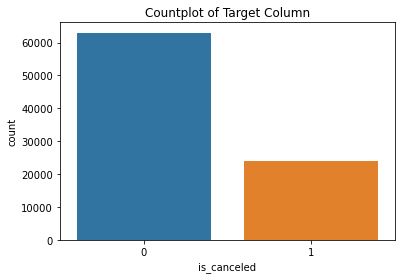

In [17]:
print(hotel.is_canceled.value_counts(normalize=True))
sns.countplot(hotel['is_canceled'])
plt.title('Countplot of Target Column')
plt.show()

**There are 62% values belongs to 0 class i.e, Booking not canceled and 37% of booking got canceled.**

### How many types of hotels are there? Which type gets more cancellation requests?

In [18]:
print(hotel.hotel.value_counts(normalize=True))
print('\n')
print(hotel[hotel.is_canceled==1]['hotel'].value_counts(normalize=True))

City Hotel      0.614424
Resort Hotel    0.385576
Name: hotel, dtype: float64


City Hotel      0.668737
Resort Hotel    0.331263
Name: hotel, dtype: float64


**There are 66% City Hotel and 33% Resort Hotel.** 

**Out of those bookings which got canceled 75% of them are City Hotel and 25% are Resort Hotel. So, we can say there is less chance that a booking of resort hotel gets a cancellation.**

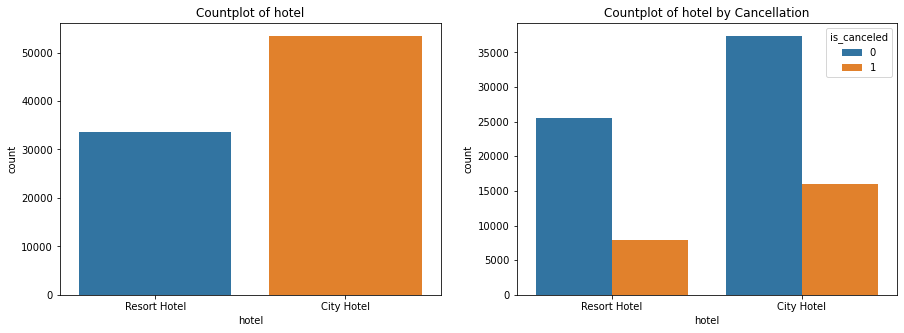

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='hotel', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='hotel', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of hotel')
ax2.set_title('Countplot of hotel by Cancellation')
plt.show()

### Types of meal options available and which is most popular meal option?

In [20]:
print(hotel.meal.value_counts(normalize=True))

BB           0.777111
SC           0.108972
HB           0.104164
Undefined    0.005613
FB           0.004141
Name: meal, dtype: float64


In [21]:
hotel['meal'] = hotel['meal'].apply(lambda x:x if(x in ['BB','HB','FB']) else 'SC')

In [22]:
print(hotel.meal.value_counts(normalize=True))

BB    0.777111
SC    0.114585
HB    0.104164
FB    0.004141
Name: meal, dtype: float64


**There is a high demand of around 77% Bed & Breakfast meal package compared to other meal packages.** 

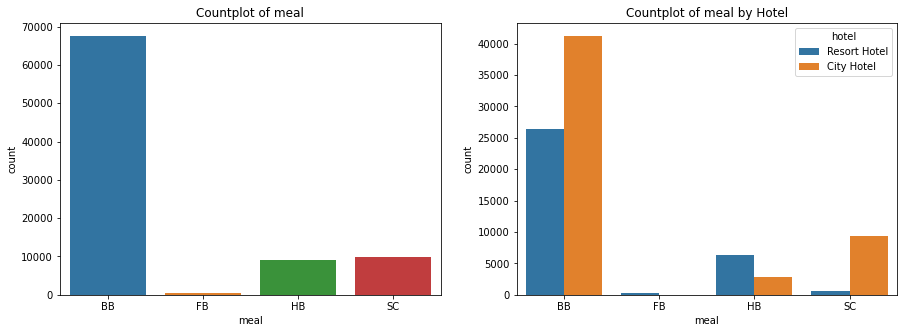

In [23]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='meal', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='meal', hue = 'hotel', data=hotel,ax=axes[1])
ax1.set_title('Countplot of meal')
ax2.set_title('Countplot of meal by Hotel')
plt.show()

From the above graph, we can see that 
- In City Hotel there is high demand of BB meal package. 
- FB meal is preferrable only in Resort Hotel.
- SC(no meal) package is mainly in City Hotel as people may stay in hotel for very few days. 
- HB has almost equal proportion in both CIty as well as in Resort Hotels.

**Deposit Type**

In [24]:
print(hotel.deposit_type.value_counts(normalize=True))

No Deposit    0.986841
Non Refund    0.011928
Refundable    0.001231
Name: deposit_type, dtype: float64


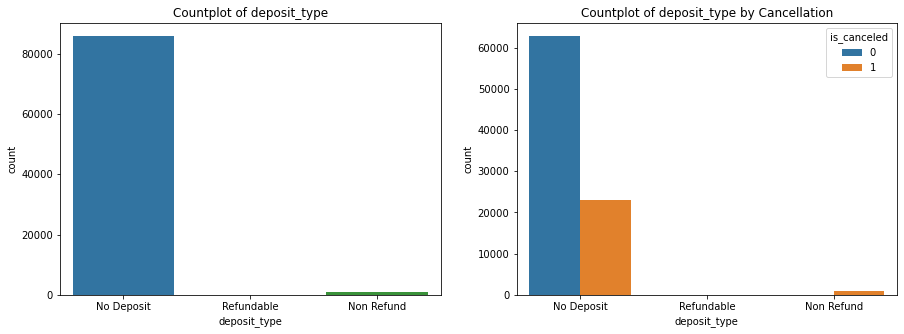

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='deposit_type', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='deposit_type', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of deposit_type')
ax2.set_title('Countplot of deposit_type by Cancellation')
plt.show()

### Customer Type

In [26]:
print(hotel.customer_type.value_counts(normalize=True))

Transient          0.823246
Transient-Party    0.134472
Contract           0.036105
Group              0.006177
Name: customer_type, dtype: float64


- 82% of the customers are of Transient Customer Type.
- 13% were Transient-Party 
- and the rest were Contract and group.

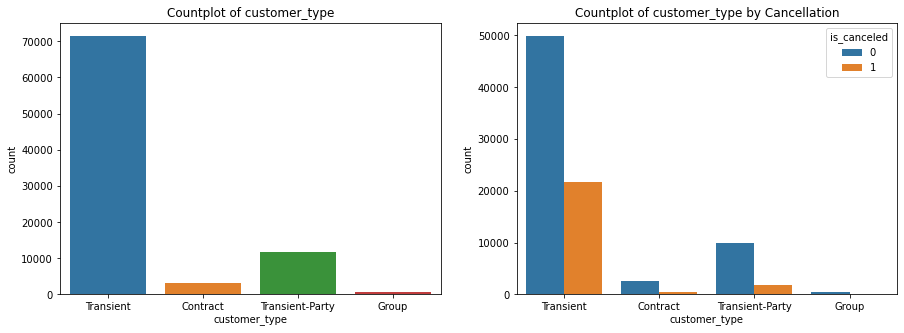

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='customer_type', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='customer_type', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of customer_type')
ax2.set_title('Countplot of customer_type by Cancellation')
plt.show()

**Reservation Status**

In [34]:
print(hotel.reservation_status.value_counts(normalize=True))

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64


In [35]:
print(hotel[hotel.is_canceled==1]['reservation_status'].value_counts(normalize=True))

Canceled    0.972707
No-Show     0.027293
Name: reservation_status, dtype: float64


From above result of value counts we can see that there is a clear seperation of target for this feature. So, we will delete this feature for further modelling process. Logically as well, if you already know the reservation status of bookings, so there is no sense of prediction whether that booking gets canceled or not.

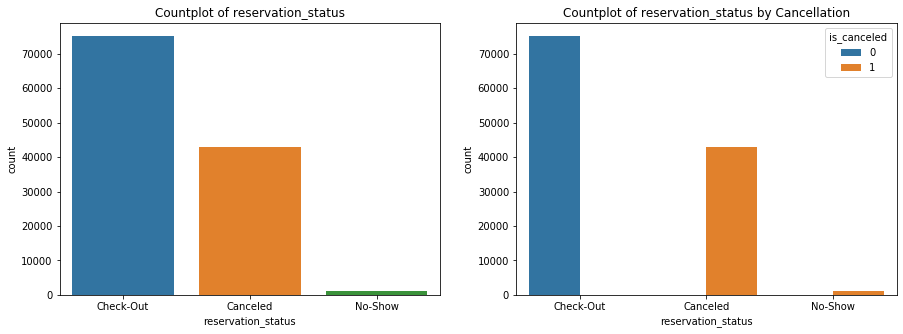

In [36]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='reservation_status', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='reservation_status', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of reservation_status')
ax2.set_title('Countplot of reservation_status by Cancellation')
plt.show()

The same can be observed from the above graph as well.

**Market Segment**

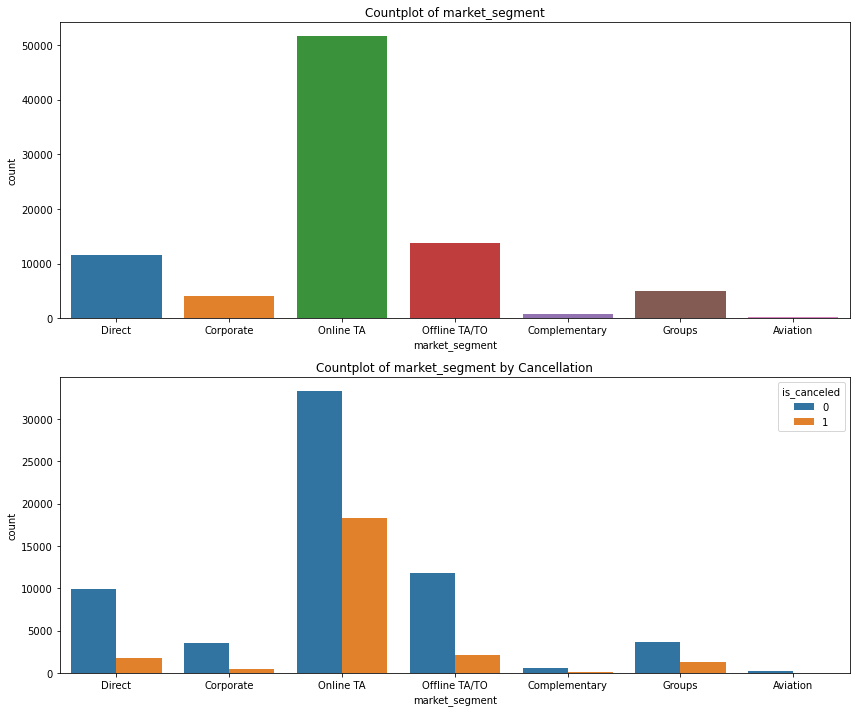

In [28]:
f, axes = plt.subplots(2, 1, figsize=(12,10), facecolor='white')
ax1 = sns.countplot(x='market_segment', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='market_segment', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of market_segment')
ax2.set_title('Countplot of market_segment by Cancellation')
plt.tight_layout()
plt.show()

In [29]:
print(hotel[hotel.is_canceled==1]['market_segment'].value_counts(normalize=True))

Online TA        0.760579
Offline TA/TO    0.085755
Direct           0.071831
Groups           0.055655
Corporate        0.020720
Complementary    0.003585
Aviation         0.001876
Name: market_segment, dtype: float64


From the above graph, we can see that 
- Groups is the only category which has more cancellation than non cancellation.
- Direct and Corporate sub-category has comparetively very less cancellation.
- While Online TA, Offline TA/TO has accquire 76% and 8% resp. of the customers who cancelled there booking.
- Rest are very low in number.

### Busiest vs Slowest month.

In [30]:
print(hotel.arrival_date_month.value_counts(normalize=True))

August       0.129193
July         0.115298
May          0.095963
April        0.090534
June         0.089176
March        0.085795
October      0.079170
September    0.076593
February     0.069508
December     0.058454
November     0.056970
January      0.053347
Name: arrival_date_month, dtype: float64


**August is the busiest month for booking and January has least bookings.**

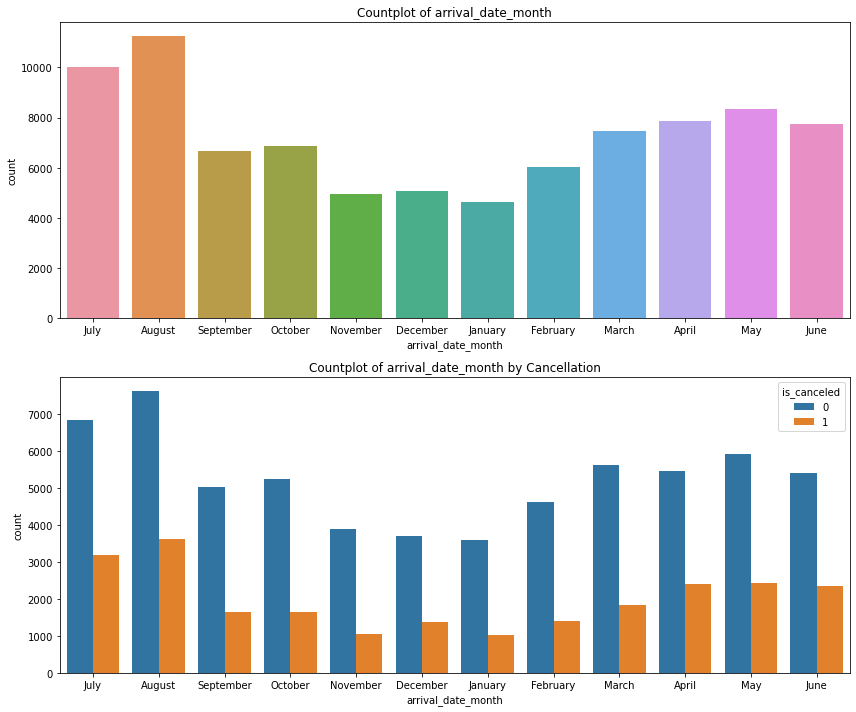

In [31]:
f, axes = plt.subplots(2, 1, figsize=(12,10), facecolor='white')
ax1 = sns.countplot(x='arrival_date_month', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='arrival_date_month', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of arrival_date_month')
ax2.set_title('Countplot of arrival_date_month by Cancellation')
plt.tight_layout()
plt.show()

### Which are top countries for booking?

In [32]:
hotel.country.value_counts(1).head(10)

PRT    0.315723
GBR    0.120002
FRA    0.101645
ESP    0.083414
DEU    0.061962
ITA    0.035266
IRL    0.034691
BEL    0.023936
BRA    0.022947
NLD    0.021981
Name: country, dtype: float64

PRT i.e, Portugal is the country which contains 40% of the booking.

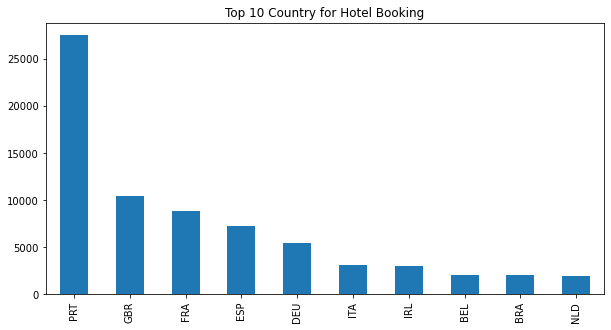

In [33]:
plt.figure(figsize=(10,5))
hotel.country.value_counts().head(10).plot.bar()
plt.title('Top 10 Country for Hotel Booking')
plt.show()

# Model Building

In [37]:
hotel=pd.get_dummies(data=hotel,columns=['hotel', 'meal','country','market_segment', 'distribution_channel',
                                         'reserved_room_type','assigned_room_type','deposit_type', 'customer_type'],
                     drop_first=True)

In [38]:
# manual encoding for arrival_date_month column
hotel['arrival_date_month'].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
                                 'August':8,'September':9,'October':10,'November':11,'December':12},inplace=True)

In [39]:
a = hotel['reservation_status_date'].str.split("-",expand=True).astype(float)
hotel['reservation_status_year'] = a[0]
hotel['reservation_status_month'] = a[1]
hotel['reservation_status_day'] = a[2]

In [40]:
hotel.drop('reservation_status_date',axis=1,inplace=True)
hotel.drop('reservation_status',axis=1,inplace=True) # from above observation made we are dropping this column for modelling.

In [41]:
hotel.corr()['is_canceled'].sort_values(ascending=False).head(20)

is_canceled                   1.000000
market_segment_Online TA      0.210727
lead_time                     0.183730
deposit_type_Non Refund       0.164957
distribution_channel_TA/TO    0.150221
customer_type_Transient       0.127758
adr                           0.126675
country_PRT                   0.122564
arrival_date_year             0.087665
stays_in_week_nights          0.082818
adults                        0.080295
children                      0.067027
stays_in_weekend_nights       0.059599
meal_SC                       0.054571
previous_cancellations        0.050965
country_CHN                   0.044532
country_AGO                   0.040552
country_ITA                   0.031961
country_ARE                   0.030407
country_BRA                   0.030347
Name: is_canceled, dtype: float64

In [42]:
X = hotel.drop('is_canceled',axis=1)
y = hotel.is_canceled

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [44]:
X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_year,reservation_status_month,reservation_status_day
109855,48,2017,4,16,16,2,0,2,0.0,0,...,0,0,0,0,0,1,0,2017.0,4.0,18.0
95609,0,2016,8,34,18,0,3,1,0.0,0,...,0,0,0,0,0,1,0,2016.0,8.0,21.0
70770,41,2017,6,25,22,0,3,2,0.0,0,...,0,0,0,0,0,1,0,2017.0,5.0,13.0
109629,37,2017,4,15,11,0,4,2,1.0,0,...,0,0,0,0,0,1,0,2017.0,4.0,15.0
15483,6,2015,7,30,20,1,0,2,0.0,0,...,0,0,0,0,0,1,0,2015.0,7.0,21.0


In [45]:
print(X_train.shape)
print(X_test.shape)

(60858, 238)
(26082, 238)


In [46]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
fold=KFold(shuffle=True,n_splits=5,random_state=42)

# Logistic Regression

In [47]:
lr = LogisticRegression(random_state=42,solver='liblinear')

result_lr=cross_val_score(lr,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
print(f"AUC Score: {result_lr.mean()}, Variance: {np.round(np.var(result_lr,ddof=1),4)}")

AUC Score: 0.9833047538504907, Variance: 0.0


As we can see we are getting a AUC Score of 98.33% from Logistic Regression this can be improved by using Decision Tree because there might be a chance that out data is not linear.

# Decision Tree

In [48]:
dt  = DecisionTreeClassifier(random_state=42)
result_dt=cross_val_score(dt,X_train,y_train,cv=fold,scoring='roc_auc')
print(f"AUC Score: {result_dt.mean()}, Variance: {np.round(np.var(result_dt,ddof=1),4)}")

AUC Score: 0.89298752630237, Variance: 0.0


So that's not the case what we have accepted Logistic Regression is performing better than Decision Tree. 
Now we check our result with more complex models like Random Forest and Gradient Boost.

# Random Forest

In [49]:
rf = RandomForestClassifier(random_state=42)
result_rf=cross_val_score(rf,X_train,y_train,cv=fold,scoring='roc_auc')
print(f"AUC Score: {result_rf.mean()}, Variance: {np.round(np.var(result_rf,ddof=1),4)}")

AUC Score: 0.9626941311387629, Variance: 0.0


# Gradient Boost

In [50]:
gb= GradientBoostingClassifier(random_state=42)
result_gb=cross_val_score(gb,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
print(f"AUC Score: {result_gb.mean()}, Variance: {np.round(np.var(result_gb,ddof=1),4)}")

AUC Score: 0.9596607144864127, Variance: 0.0001


# XGBoost

In [51]:
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=42)
result_xg=cross_val_score(xg,X_train_scaled,y_train,cv=fold,scoring='roc_auc')
print(f"AUC Score: {result_xg.mean()}, Variance: {np.round(np.var(result_xg,ddof=1),4)}")

AUC Score: 0.9998441597842185, Variance: 0.0


In [52]:
pd.DataFrame({'AUC Score':[result_lr.mean(),result_dt.mean(),result_rf.mean(),result_gb.mean(),result_xg.mean()]},
            index=['Logistic Regression','Decision Tree','Random Forest','Gradient Boost','XgBoost']).sort_values('AUC Score')

,AUC Score
Decision Tree,0.892988
Gradient Boost,0.959661
Random Forest,0.962694
Logistic Regression,0.983305
XgBoost,0.999844


By observing the above result, we have a clear winner i.e, **XGboost**. So we choose it as our final model.

In [57]:
xg.fit(X_train_scaled,y_train)
y_test_pred = xg.predict(X_test_scaled)
y_test_prob = xg.predict_proba(X_test_scaled)[:,1]

print('Classification report')
print(classification_report(y_test,y_test_pred))
print('*'*50)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_test_pred))
print('*'*50)
print('Accuracy of Test:', accuracy_score(y_test,y_test_pred))
print('AUC of Test:', roc_auc_score(y_test,y_test_prob))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18886
           1       1.00      0.99      0.99      7196

    accuracy                           1.00     26082
   macro avg       1.00      1.00      1.00     26082
weighted avg       1.00      1.00      1.00     26082

**************************************************
Confusion Matrix
[[18878     8]
 [   64  7132]]
**************************************************
Accuracy of Test: 0.9972394755003451
AUC of Test: 0.999902533895041


In [ ]:
## NO NEED FOR HYPERPARAMETER TUNING: